## Notebook showcasing the various options in Roodmus for analysis and visualisations
In this notebook, the user can load metadata from one or several jobs from a processing pipeline done in RELION or cryoSPARC. This metadata, along with the ground-truth particle parameters are loaded into data frames, which allow for easy and conveniet plotting. We also provide several convenient functions to make plots.


In [20]:
### imports
# general
import os
import mrcfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roodmus
from importlib import reload
import roodmus.analysis.utils
reload(roodmus.analysis.utils)
from roodmus.analysis.utils import load_data

import roodmus.analysis.plot_ctf
reload(roodmus.analysis.plot_ctf)
from roodmus.analysis.plot_ctf import plot_CTF, plot_defocus_scatter

import roodmus.analysis.plot_picking
reload(roodmus.analysis.plot_picking)
from roodmus.analysis.plot_picking import label_micrograph_picked, label_micrograph_truth, label_micrograph_truth_and_picked, plot_precision, plot_recall, plot_boundary_investigation, plot_overlap_investigation
# from roodmus.analysis.analyse_alignment import alignment_3D
# from roodmus.analysis.plot_alignment import 


In [44]:
### data loading
config_dir = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/test/"
meta_files = [
    # "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs",
    # "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J296_020_particles.cs",
    # "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J297_passthrough_particles_selected.cs",
    # "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J298_picked_particles.cs",
    # "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J428_040_particles.cs",
    # "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J429_passthrough_particles_selected.cs",
    ["/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs", # a list of files is also possible if the metadata is split over multiple files
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_005_particles.cs"],
]

jobtypes = {
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs": "blob picking",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J296_020_particles.cs": "2D classification",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J297_passthrough_particles_selected.cs": "class selection",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J298_picked_particles.cs": "template picking",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J428_040_particles.cs": "2D classification 2",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J429_passthrough_particles_selected.cs": "class selection 2",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs": "3D classification",   
}

# meta_files = [
#     "data/6xm5_steered_Roodmus_1/RELION/job015_manual.star",
#     "data/6xm5_steered_Roodmus_1/RELION/job006_topaz.star",
#     "data/6xm5_steered_Roodmus_1/RELION/job008_subset_selection.star",
# ]

# jobtypes = {
#     "data/6xm5_steered_Roodmus_1/RELION/job015_manual.star": "manual picking",	
#     "data/6xm5_steered_Roodmus_1/RELION/job006_topaz.star": "topaz picking",
#     "data/6xm5_steered_Roodmus_1/RELION/job008_subset_selection.star": "2D classification",
# }

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True

for i, meta_file in enumerate(meta_files):
    if i == 0:
        analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose) # creates the class
    else:
        analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file


loading metadata from ['/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs', '/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_005_particles.cs']...
/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs
loaded metadata from ['/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs', '/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_005_particles.cs']. determined file type: cs
/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_005_particles.cs
loaded metadata from ['/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs', '/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_005_particles.cs']. determined file type: cs
loading 2 files into the results
found 205 particles


Dictionaries now contain 205 

loading micrographs: 100%|██████████| 5/5 [00:01<00:00,  3.71it/s, micrograph=000004.mrc]

Loaded ground-truth particle positions from config files
Dictionaries now contain 205 particles and 1250 true particles
Added 1250 particles from /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/test/


In [3]:
### data loading
config_dir = "/home/mjoosten1/projects/roodmus/data/DESRES/MapReconstruction/Micrographs/"
meta_files = [
    "data/DESRES/MapReconstruction/Extract/job007/particles.star",
    "data/DESRES/MapReconstruction/Class2D/job008/run_it200_data.star",
    "data/DESRES/MapReconstruction/Select/job009/particles.star",
    "data/DESRES/MapReconstruction/InitialModel/job010/run_it100_data.star",
    # "data/DESRES/MapReconstruction/Class3D/job011/run_it000_data.star"
]

jobtypes = {
    "data/DESRES/MapReconstruction/Extract/job007/particles.star": "topaz picking",
    "data/DESRES/MapReconstruction/Class2D/job008/run_it200_data.star": "2D classification",
    "data/DESRES/MapReconstruction/Select/job009/particles.star": "class selection",
    "data/DESRES/MapReconstruction/InitialModel/job010/run_it100_data.star": "3D initial model",
    "data/DESRES/MapReconstruction/Class3D/job011/run_it100_data.star": "3D classification",
}

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True

for i, meta_file in enumerate(meta_files):
    if i == 0:
        analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose) # creates the class
    else:
        analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file


loading metadata from data/DESRES/MapReconstruction/Extract/job007/particles.star...
data/DESRES/MapReconstruction/Extract/job007/particles.star
loaded metadata from data/DESRES/MapReconstruction/Extract/job007/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 240974 particles and 0 true particles
added 240974 particles from data/DESRES/MapReconstruction/Extract/job007/particles.star


loading micrographs: 100%|██████████| 900/900 [07:53<00:00,  1.90it/s, micrograph=000899.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 240974 particles and 270000 true particles
Added 270000 particles from /home/mjoosten1/projects/roodmus/data/DESRES/MapReconstruction/Micrographs/
loading metadata from data/DESRES/MapReconstruction/Class2D/job008/run_it200_data.star...
data/DESRES/MapReconstruction/Class2D/job008/run_it200_data.star
loaded metadata from data/DESRES/MapReconstruction/Class2D/job008/run_it200_data.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 481948 particles and 270000 true particles
added 240974 particles from data/DESRES/MapReconstruction/Class2D/job008/run_it200_data.star
loading metadata from data/DESRES/MapReconstruction/Select/job009/particles.star...
data/DESRES/MapReconstruction/Select/job009/particles.star
loaded metadata from data/DESRES/MapReconstruction/Select/job009/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 718

In [113]:
for key in analysis.results_picking.keys():
    print(key, len(analysis.results_picking[key]))

for key in analysis.results_truth.keys():
    print(key, len(analysis.results_truth[key]))

metadata_filename 2706
ugraph_filename 2706
position_x 2706
position_y 2706
euler_phi 2706
euler_theta 2706
euler_psi 2706
ugraph_shape 2706
defocusU 2706
defocusV 2706
class2D 2706
ugraph_filename 3000
ice_thickness 3000
pdb_filename 3000
position_x 3000
position_y 3000
position_z 3000
euler_phi 3000
euler_theta 3000
euler_psi 3000
defocus 3000


In [4]:
### turn the loaded data into a pandas dataframe
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
# df_truth.head()
df_picked.tail()


metadata_filename ugraph_filename  \
954101  data/DESRES/MapReconstruction/InitialModel/job...      000899.mrc   
954102  data/DESRES/MapReconstruction/InitialModel/job...      000899.mrc   
954103  data/DESRES/MapReconstruction/InitialModel/job...      000899.mrc   
954104  data/DESRES/MapReconstruction/InitialModel/job...      000899.mrc   
954105  data/DESRES/MapReconstruction/InitialModel/job...      000899.mrc   

        position_x  position_y   euler_phi euler_theta  euler_psi  \
954101      2457.0       714.0   62.135084  129.814578  -55.41055   
954102      3871.0      2513.0  -172.83740  143.260013  -78.97443   
954103      1946.0      3654.0   -38.77748   53.989812  11.741058   
954104      1449.0      2632.0  162.219718  112.487239  -98.33617   
954105       217.0        84.0  109.868036   46.089070   2.764217   

        ugraph_shape      defocusU      defocusV class2D  
954101  (4000, 4000)  24631.113281  24599.445312       1  
954102  (4000, 4000)  24631.113281  24599.445312       1  
954103  (4000, 4000)  24631.113281  24599.445312       1  
954104  (4000, 4000)  24631.113281  24599.445312       1  
954105  (4000, 4000)  24631.113281  24599.445312       1

In [ ]:
### saving the dataframes
# it is recommended to save the dataframes after running the rest of the notebook, as they may be modified by downstream analysis

df_picked.to_csv("picked_particles.csv")
df_truth.to_csv("truth_particles.csv")

### CTF estimation


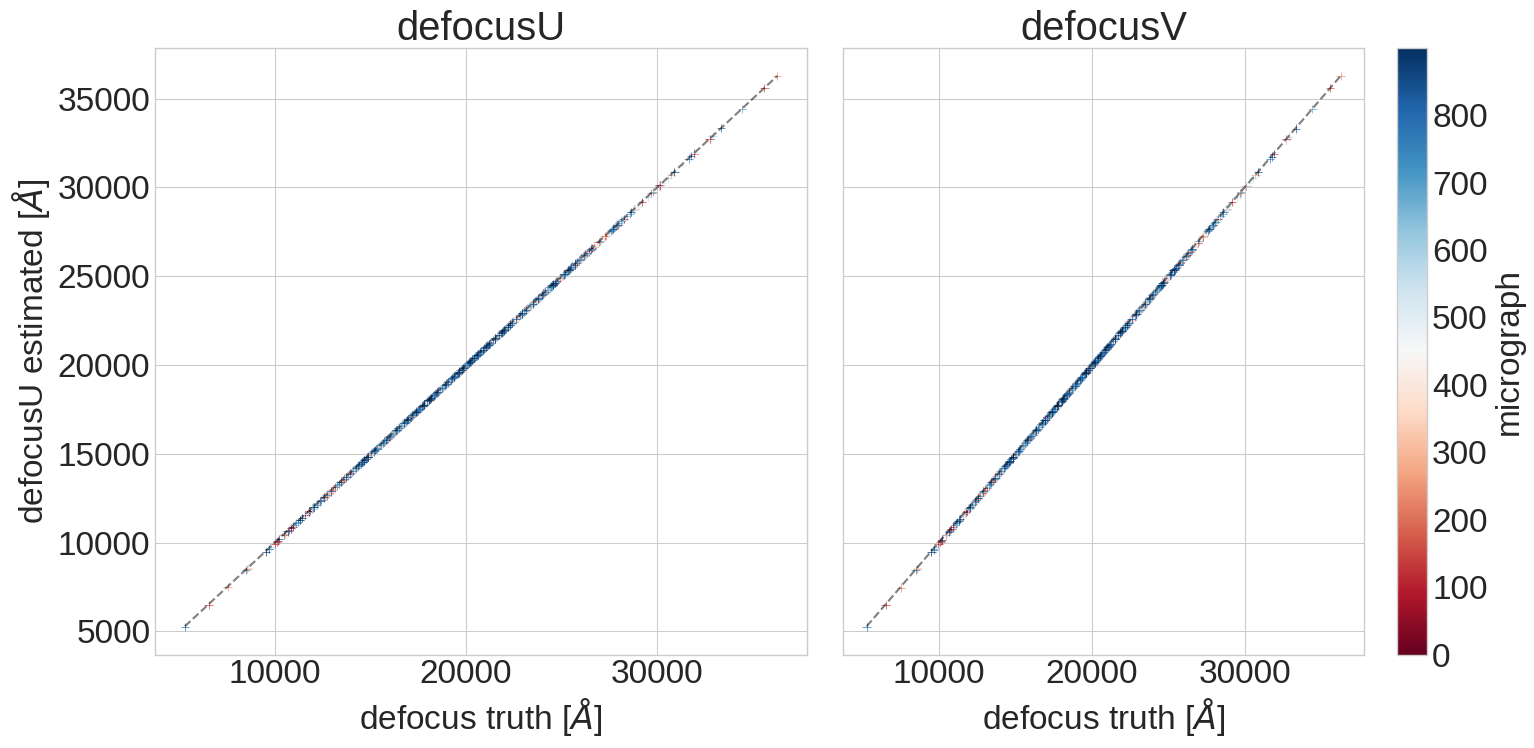

In [5]:
### scatter plot of the estimated vs. the true defocus values
meta_index = 0 # index of the metadata file to plot

palette = "RdBu"

fig, ax = plot_defocus_scatter(df_picked,
                                meta_files[meta_index],
                                df_truth,
                                palette=palette)


plotted index 3; micrograph: 000003.mrc


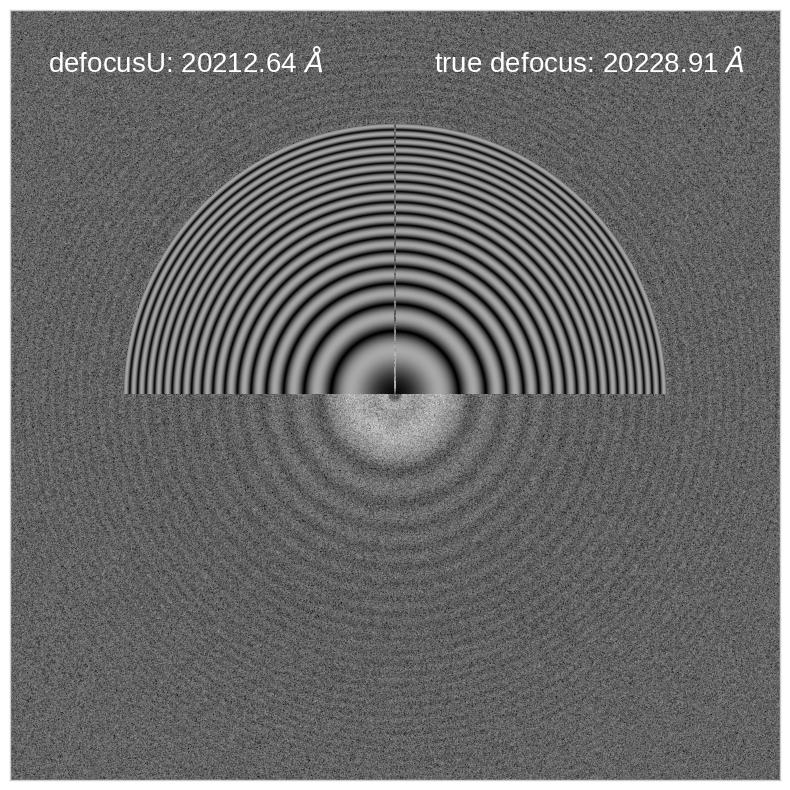

In [6]:
### plot the CTF estimation for a single micrograph
meta_index = 0 # index of the metadata file to plot
ugraph_index = 3 # which micrograph to plot

fig, ax = plot_CTF(df_picked, meta_files[meta_index],
                    df_truth, config_dir, ugraph_index)

In [7]:
### plot the CTF for the particle with the largest defocus error (should take no more than a few seconds)
max_error_index = 0
max_error = 0
for i, groupname in enumerate(df_picked.groupby(["ugraph_filename"]).groups.keys()):
    defocus_estimated = df_picked.groupby(["ugraph_filename"]).get_group(groupname)["defocusU"].mean()
    defcous_true = np.abs(df_truth.groupby(["ugraph_filename"]).get_group(groupname)["defocus"].mean())
    error = np.abs(defocus_estimated - defcous_true)
    if error > max_error:
        max_error = error
        max_error_index = i

fig, ax = plot_CTF(df_picked, None, df_truth, config_dir, max_error_index)


plotted index 744; micrograph: 000744.mrc


FileNotFoundError: [Errno 2] No such file or directory: '/home/mjoosten1/projects/roodmus/data/DESRES/MapReconstruction/Micrographs/000744.mrc'

### Particle picking

plotted index 0; micrograph: 000000.mrc
Using box half width: 24.0 and half height: 24.0
number of boxes: 269


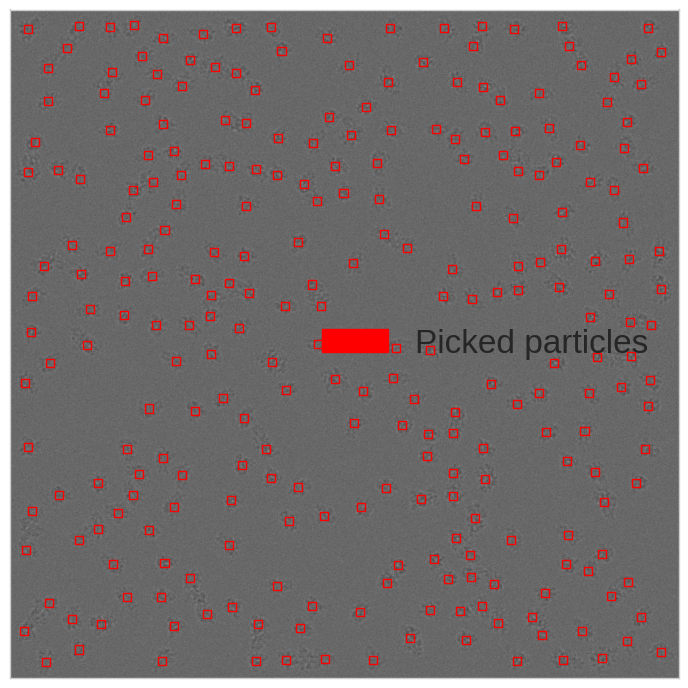

In [123]:
### plot the picked particles
ugraph_index = 0 # which micrograph to plot
metadata_index = 0 # which metadata file to plot

fig, ax = label_micrograph_picked(df_picked, meta_files[meta_index],
                                   ugraph_index, config_dir, box_width=48, box_height=48, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


plotted index 3; micrograph: 000003.mrc
Using box half width: 16.0 and half height: 16.0
number of boxes: 300


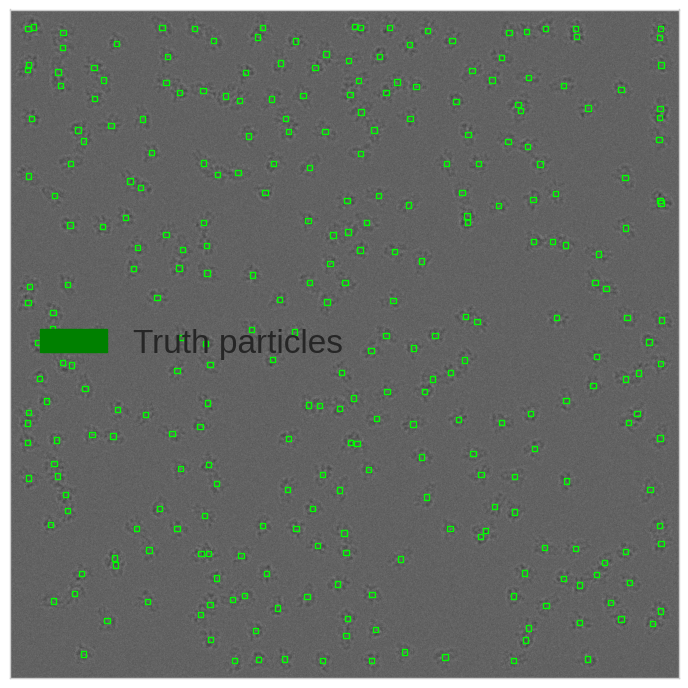

In [124]:
### plot the truth particles
ugraph_index = 3 # which micrograph to plot

fig, ax = label_micrograph_truth(df_truth, ugraph_index, config_dir, box_width=32, box_height=32, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


plotted index 3; micrograph: 000003.mrc
Using box half width: 24.0 and half height: 24.0
number of boxes: 268
Using box half width: 24.0 and half height: 24.0
number of boxes: 300


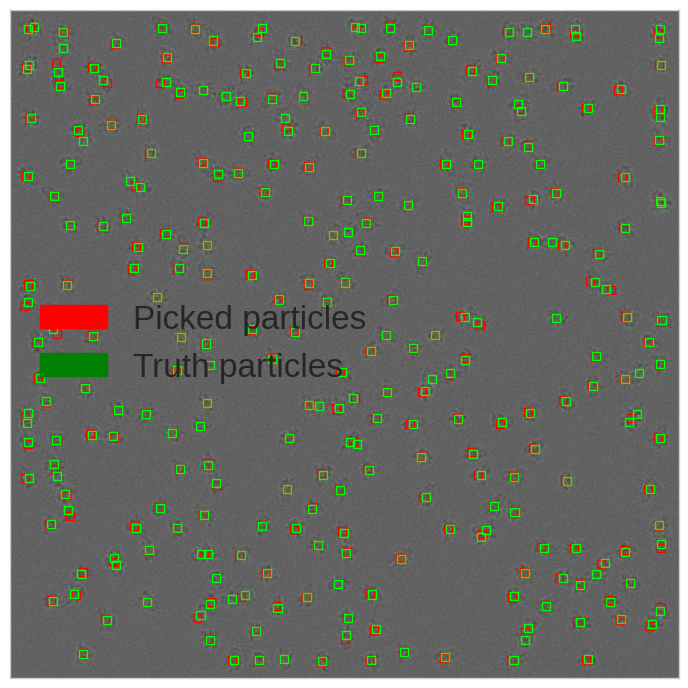

In [125]:
### plot the truth and picked particles
ugraph_index = 3 # which micrograph to plot
metadata_index = 0 # which metadata file to plot

fig, ax = label_micrograph_truth_and_picked(df_picked, meta_files[meta_index],
                                             df_truth, ugraph_index, config_dir, box_width=48, box_height=48, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


In [8]:
### compute precision and recall (may take a few minutes)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)
df_precision.head()


For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 3600
Number of micgrographs: 900
Number of metadata files: 4
Starting loop over groups


computing precision: 100%|██████████| 3600/3600 [05:14<00:00, 11.44it/s, precision=1, recall=0.957, multiplicity=0.96]     


time taken to compute precision: 318.2608873844147


metadata_filename ugraph_filename  \
0  data/DESRES/MapReconstruction/Class2D/job008/r...      000000.mrc   
1  data/DESRES/MapReconstruction/Class2D/job008/r...      000001.mrc   
2  data/DESRES/MapReconstruction/Class2D/job008/r...      000002.mrc   
3  data/DESRES/MapReconstruction/Class2D/job008/r...      000003.mrc   
4  data/DESRES/MapReconstruction/Class2D/job008/r...      000004.mrc   

        defocus  num_particles_picked  num_particles_truth   TP  FP  FN  \
0 -15309.734341                   269                  300  269   0  12   
1 -26247.911555                   263                  300  263   0   8   
2 -24737.877217                   266                  300  266   0  10   
3 -20228.908035                   268                  300  267   1  13   
4 -17079.156566                   275                  300  272   3   9   

   precision    recall  multiplicity  
0   1.000000  0.957295      0.960000  
1   1.000000  0.970480      0.973333  
2   1.000000  0.963768      0.966667  
3   0.996269  0.953571      0.956667  
4   0.989091  0.967972      0.970000

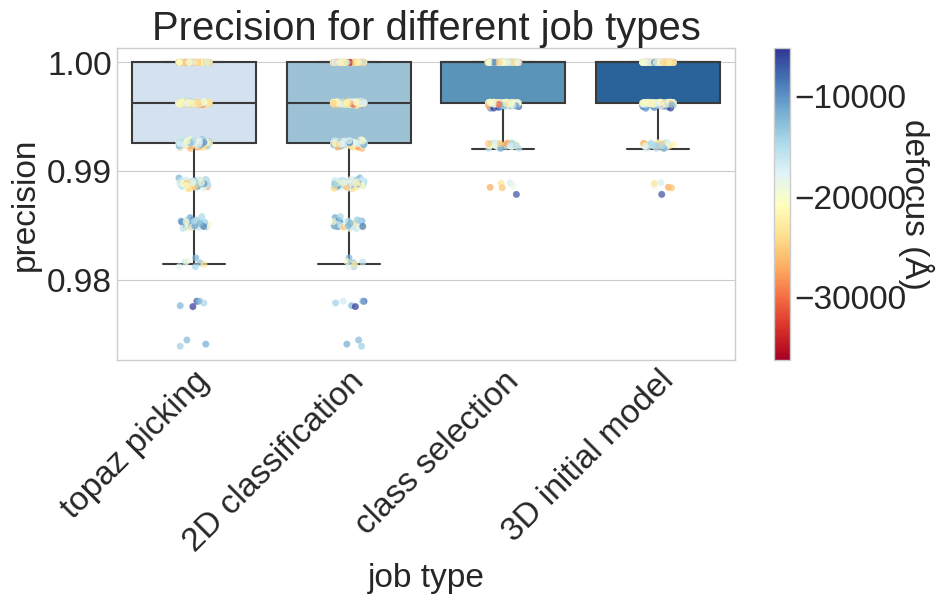

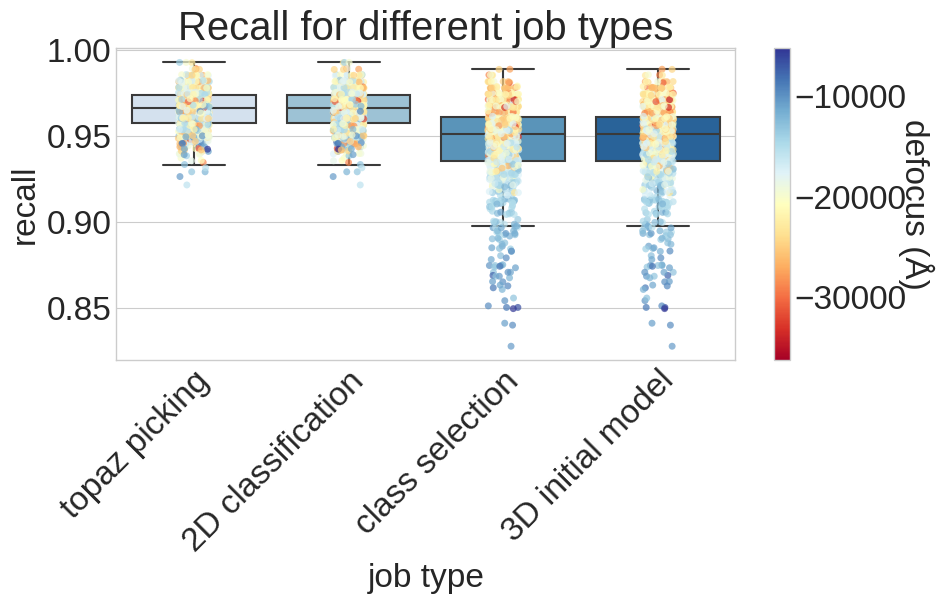

In [21]:
### plot boxplot for precision and recall
fig, ax = plot_precision(df_precision, jobtypes, meta_files)
fig.set_size_inches([10,10])
fig, ax = plot_recall(df_precision, jobtypes, meta_files)
fig.set_size_inches([10,10])


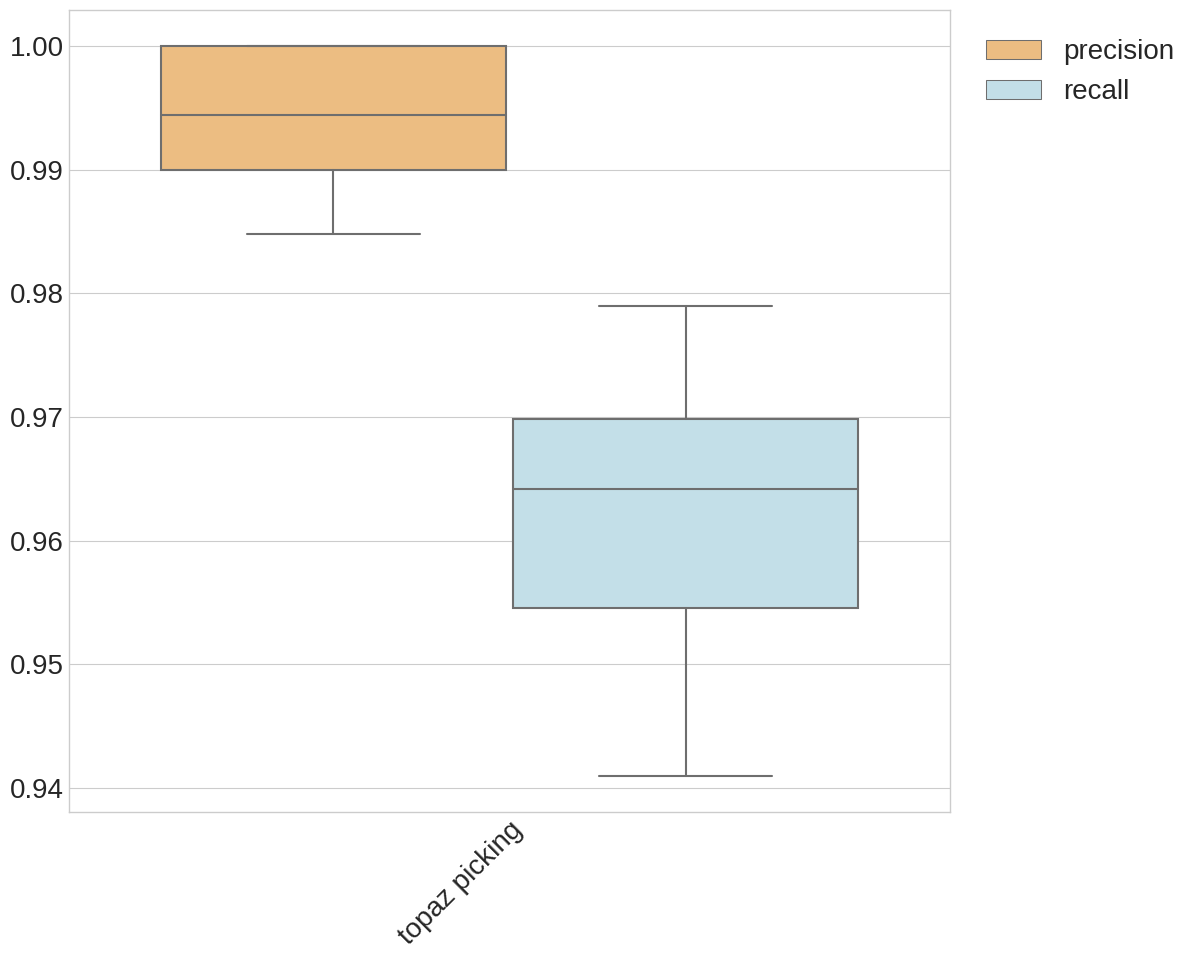

In [132]:
### alternatively, plot the precision and recall in the same plot
df = df_precision.melt(id_vars=["metadata_filename", "ugraph_filename", "defocus", "TP", "FP", "FN", "multiplicity", "num_particles_picked", "num_particles_truth"])

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="metadata_filename", y="value", data=df, ax=ax, fliersize=0, palette="RdYlBu", hue="variable")
ax.set_ylabel("")
ax.set_xlabel("")
# change the xtix labels to the jobtypes
ax.set_xticklabels([jobtypes[meta_file] for meta_file in np.unique(df["metadata_filename"]) if meta_file in jobtypes.keys() ])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# add legend below axis
ax.legend().set_visible(False)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=1, bbox_to_anchor=(1.1, 0.85))
fig.tight_layout()



plotted index 3; micrograph: 000003.mrc
Using box half width: 24.0 and half height: 24.0
number of boxes: 55


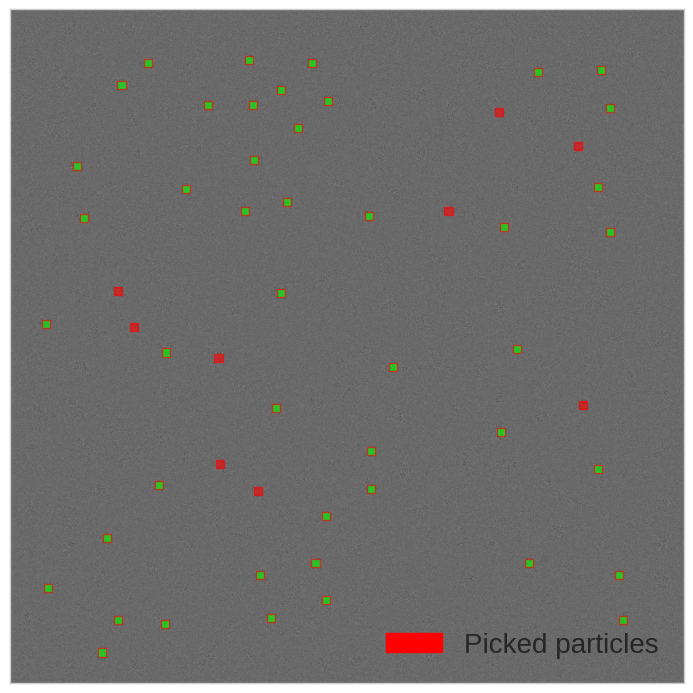

In [61]:
### plot the picked particles, now with the TP and FP marked in green and red
ugraph_index = 3 # which micrograph to plot
metadata_index = 0 # which metadata file to plot

fig, ax = label_micrograph_picked(df_picked, meta_files[meta_index], ugraph_index, config_dir, box_width=48, box_height=48, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)

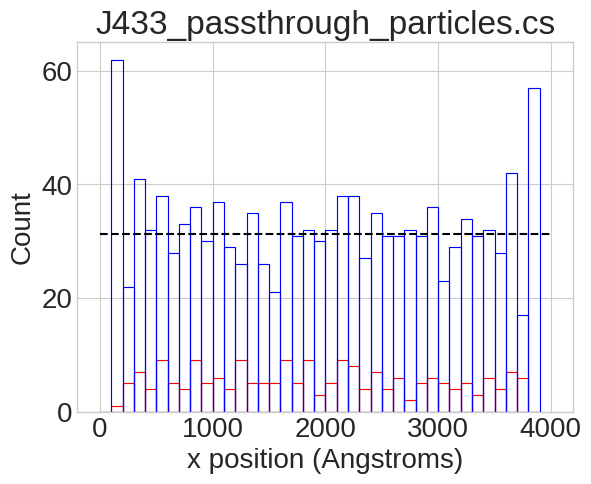

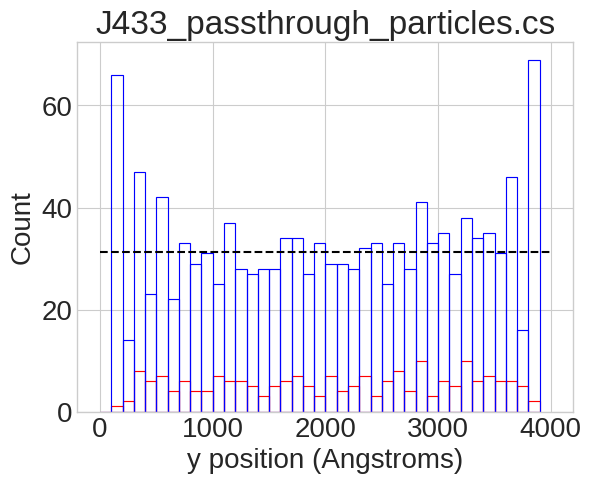

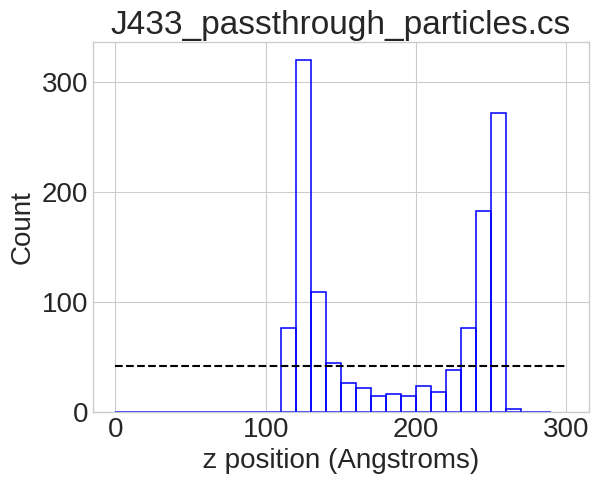

In [64]:
### plot the distribution of the particles in the ugraphs in x, y, and z directions
metadata_index = 0 # which metadata file to plot
bin_width = [100, 100, 10] # bin width for x, y, z
axis = ["x", "y", "z"]

metadata_filename = meta_files[metadata_index]
for a, bnwdth in zip(axis, bin_width):
    fig, ax = plot_boundary_investigation(df_truth, df_picked, metadata_filename, bnwdth, axis=a)

In [65]:
df_overlap = analysis.compute_overlap(df_picked, df_truth, verbose=verbose)
df_overlap.head()

computing overlap: 100%|██████████| 5/5 [00:00<00:00, 128.89it/s, neighbours_truth=9, neighbours_picked=17.5] 


metadata_filename ugraph_filename  \
0  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
1  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
2  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
3  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
4  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   

       defocus  radius  neighbours_truth  neighbours_picked  
0 -1459.348516     5.0               0.0                0.5  
1 -1459.348516    10.0               0.0                2.0  
2 -1459.348516    15.0               0.0                3.5  
3 -1459.348516    20.0               0.0                6.0  
4 -1459.348516    25.0               0.0                6.5

plotting overlap for /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs


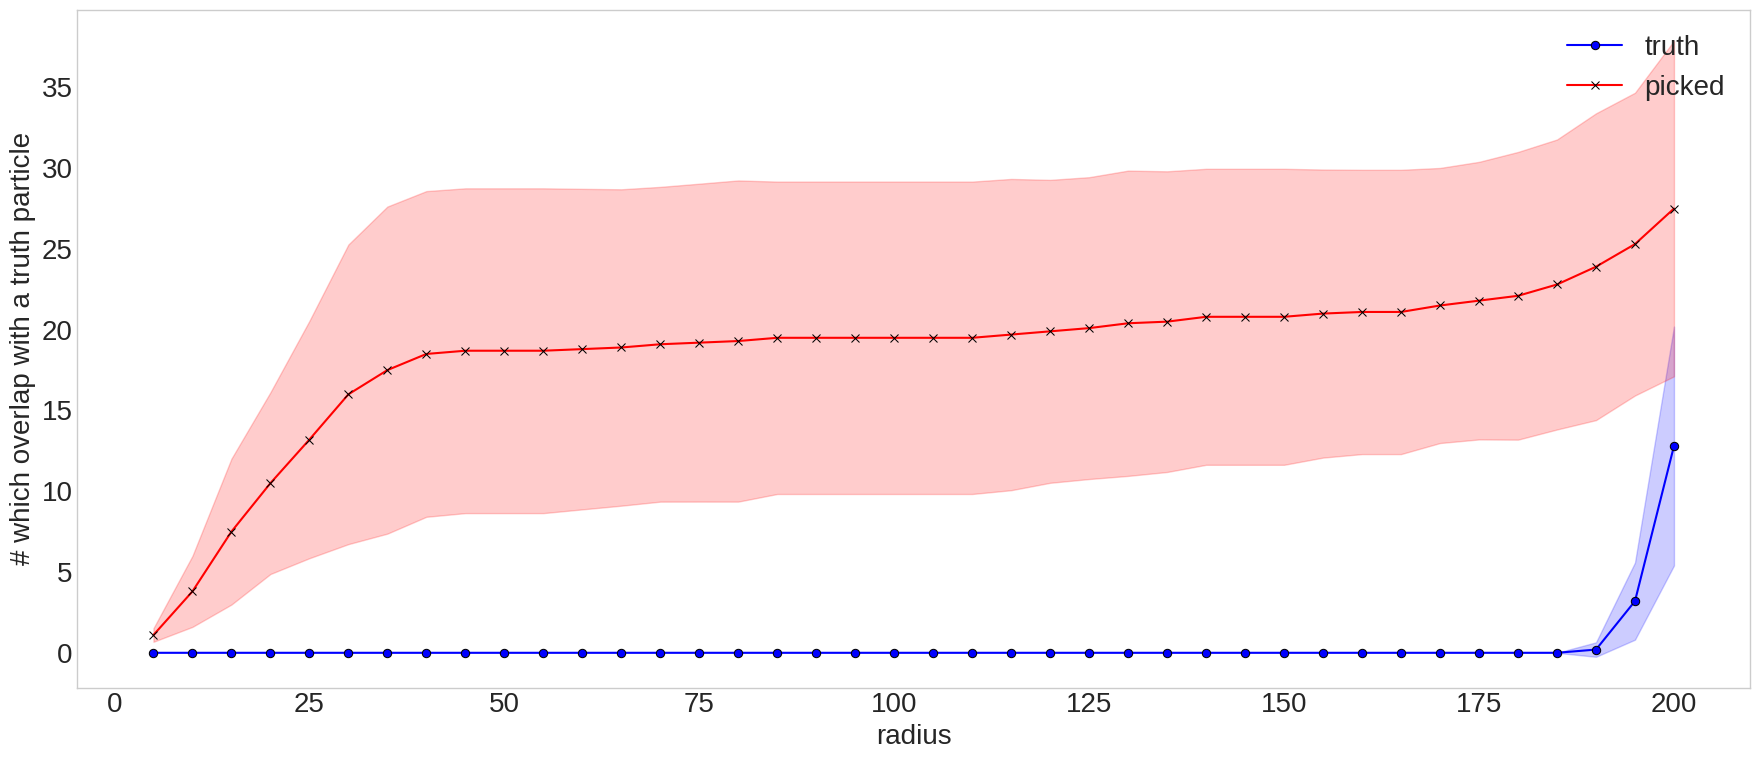

In [68]:
### plot the overlap between the picked and truth particles
metadata_index = 0 # which metadata file to plot. If None, all metadata files are plotted

metadata_filename = meta_files[metadata_index]
fig, ax = plot_overlap_investigation(df_overlap, metadata_filename, jobtypes=jobtypes)


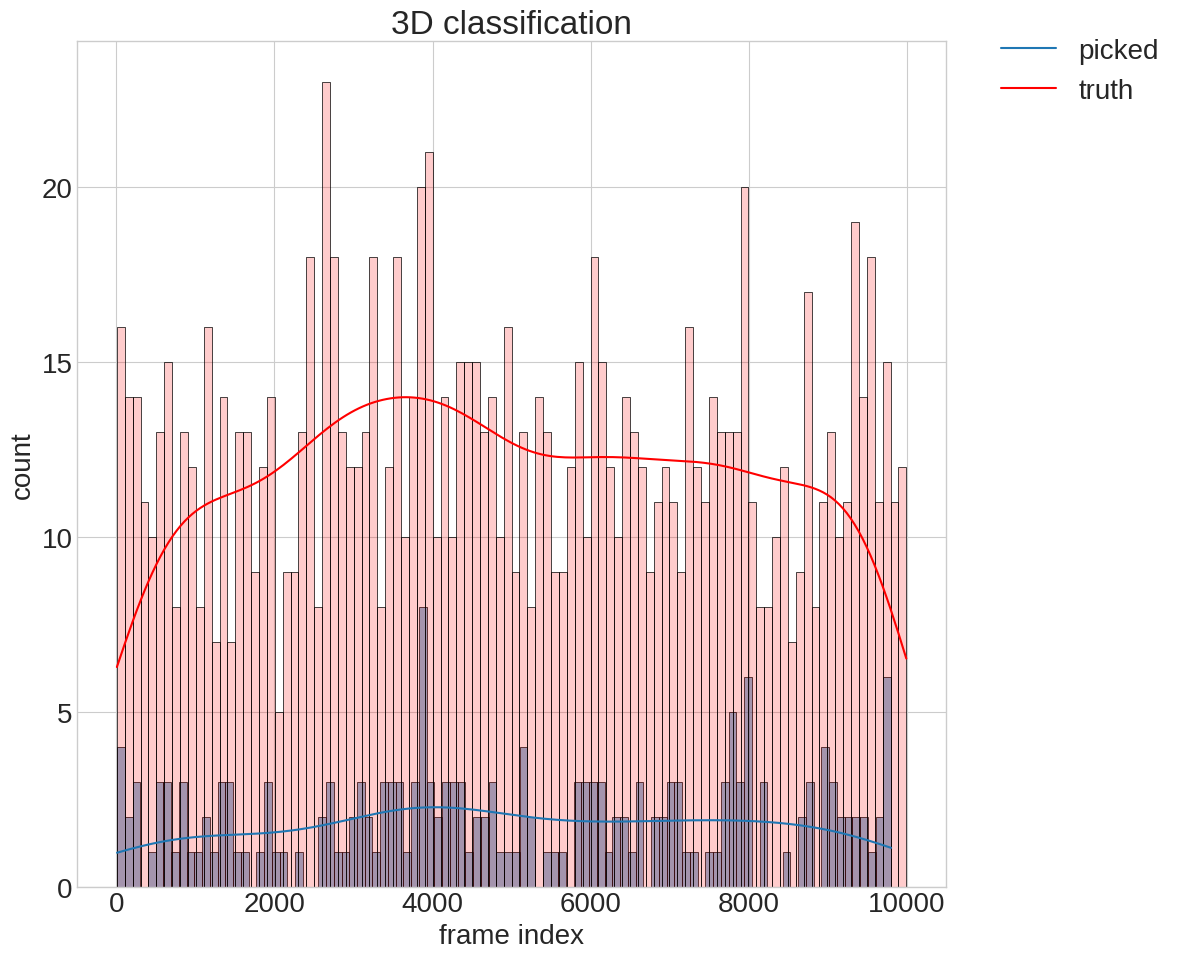

In [70]:
### plot the distribution of trajectory frames in a metadata file
metadata_index = 0 # which metadata file to plot

metadata_filene = meta_files[metadata_index]
if isinstance(metadata_filename, list):
    metadata_filename = metadata_filename[0]

df_picked["closest_pdb_index"] = df_picked["closest_pdb"].apply(lambda x: int(x.split("_")[-1].split(".")[0]))
# set the closest_pdb_index to np.nan if the particle is not closer to a truth particle thatn the particle diameter
df_picked.loc[df_picked["closest_dist"] > particle_diameter, "closest_pdb_index"] = np.nan
df_truth["pdb_index"] = df_truth["pdb_filename"].apply(lambda x: int(x.split("_")[-1].split(".")[0]))

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(figsize = (10, 10))
sns.histplot(df_picked.groupby("metadata_filename").get_group(metadata_filename)["closest_pdb_index"], ax=ax, bins=100, kde=True)
sns.histplot(df_truth["pdb_index"], ax=ax, bins=100, kde=True, color="red", alpha=0.2)
ax.set_xlabel("frame index")
ax.set_ylabel("count")
ax.set_title(jobtypes[metadata_filename])
fig.tight_layout()
fig.legend(["picked", "truth"], loc='lower center', ncol=1, bbox_to_anchor=(1.1, 0.85))



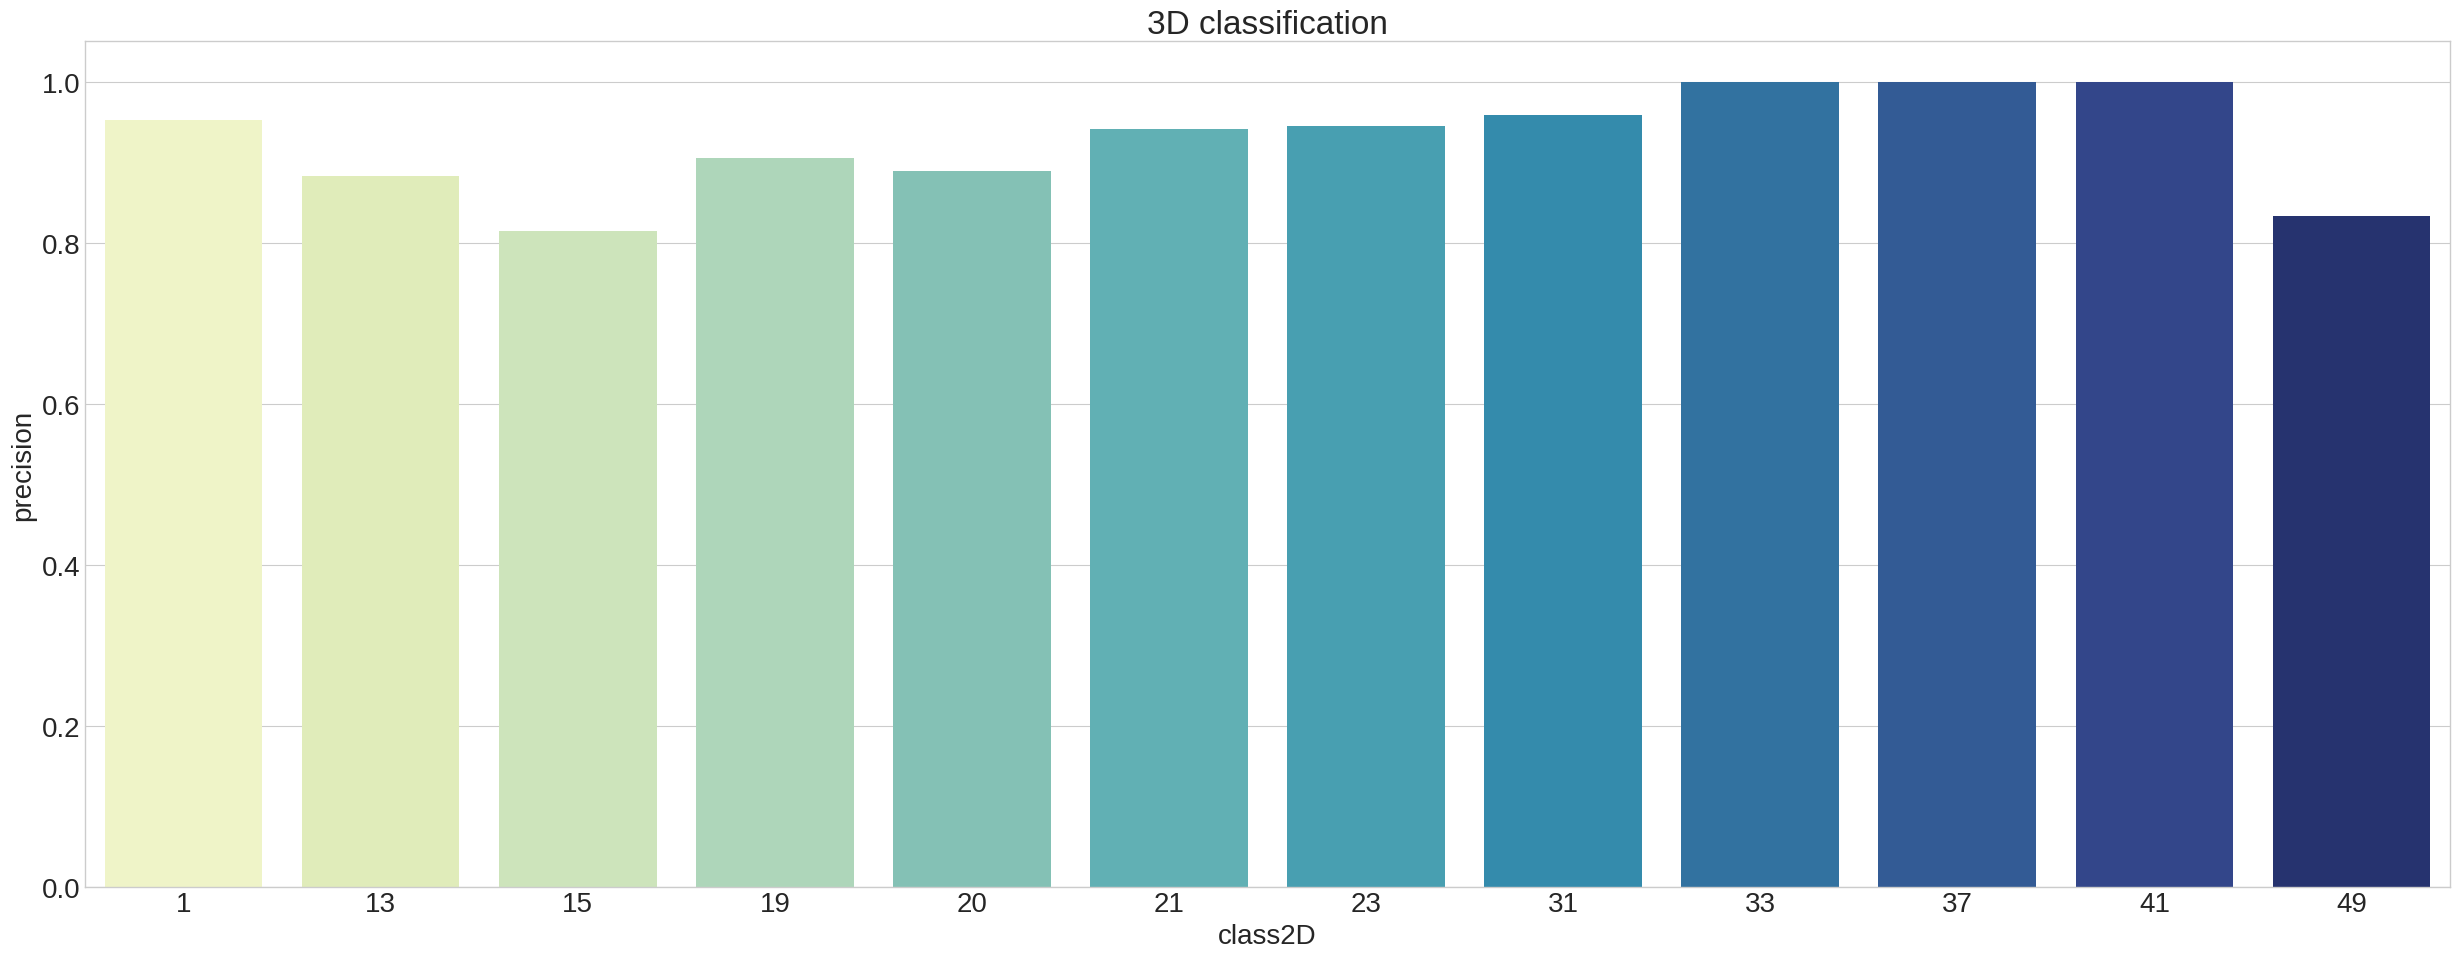

In [72]:
### plot the precision per class
metadata_index = 0 # which metadata file to plot. Must have a class2D column

metadata_filename = meta_files[metadata_index]
if isinstance(metadata_filename, list):
    metadata_filename = metadata_filename[0]

df_grouped = df_picked.groupby("metadata_filename").get_group(metadata_filename)
results = {
    "class2D": [],
    "precision": [],
    "average defocus": [],
}
for groupname in df_grouped.groupby("class2D").groups.keys():
    precision = df_grouped.groupby("class2D").get_group(groupname)["TP"].sum() / (df_grouped.groupby("class2D").get_group(groupname)["TP"].size)
    results["class2D"].append(int(groupname))
    results["precision"].append(precision)
    results["average defocus"].append(df_grouped.groupby("class2D").get_group(groupname)["defocusU"].mean())
df = pd.DataFrame(results)

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(figsize = (25, 10))
sns.barplot(x="class2D", y="precision", data=df, ax=ax, palette="YlGnBu")
ax.set_xlabel("class2D")
ax.set_ylabel("precision")
ax.set_title(jobtypes[metadata_filename])
# remove every second xtick label
fig.tight_layout()



### 3D alignment

In [ ]:
analysis_alignment = alignment_3D(meta_file, config_dir, load_all_configs=True, verbose=verbose) # creates the class
df_alignment_estimated = pd.DataFrame(analysis_alignment.results_picking)
df_alignment_truth = pd.DataFrame(analysis_alignment.results_truth)
df_alignment_truth

In [ ]:
### plot the alignment
grid = sns.jointplot(x="euler1", y="euler2", data=df_alignment_estimated, kind="hex", color="k", gridsize=50, bins="log", cmap="viridis")
grid.ax_joint.set_xlabel("Euler 1")
grid.ax_joint.set_ylabel("Euler 2")
grid.fig.set_size_inches(14, 7)
# adjust the x and y ticks to show multiples of pi
grid.ax_joint.set_xticks([-np.pi, -3/4*np.pi, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3/4*np.pi, np.pi])
grid.ax_joint.set_xticklabels(["$-\pi$", "$-3/4\pi$", "$-\pi/2$", "$-\pi/4$", "$0$", "$\pi/4$", "$\pi/2$", "$3/4\pi$", "$\pi$"])
grid.ax_joint.set_yticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
grid.ax_joint.set_yticklabels(["$-\pi/2$", "$-\pi/4$", "$0$", "$\pi/4$", "$\pi/2$"])

# repeat for the true particles
grid = sns.jointplot(x="euler1", y="euler2", data=df_alignment_truth, kind="hex", color="k", gridsize=50, bins="log", cmap="viridis")
grid.ax_joint.set_xlabel("Euler 1")
grid.ax_joint.set_ylabel("Euler 2")
grid.fig.set_size_inches(14, 7)
# adjust the x and y ticks to show multiples of pi
grid.ax_joint.set_xticks([-np.pi, -3/4*np.pi, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3/4*np.pi, np.pi])
grid.ax_joint.set_xticklabels(["$-\pi$", "$-3/4\pi$", "$-\pi/2$", "$-\pi/4$", "$0$", "$\pi/4$", "$\pi/2$", "$3/4\pi$", "$\pi$"])
grid.ax_joint.set_yticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
grid.ax_joint.set_yticklabels(["$-\pi/2$", "$-\pi/4$", "$0$", "$\pi/4$", "$\pi/2$"])



### Misc investigations